In [6]:
# Step 0: Imports & basic config

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 200)
sns.set_theme(style="whitegrid", context="notebook")

In [7]:
# Step 1: Load data and summarize structure

DATA_PATH = "../data/interim/merged_dataset.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nFirst 5 rows:")
display(df.head())

Shape: (6612, 31)

Dtypes:
 CASEID                              object
AGE                                  int64
AGE_GRP                            float64
REGION                              object
EDUC_LEVEL                          object
RELIGION                            object
ETHNICITY                           object
EDUC                                object
HOUSEHOLD_HEAD_SEX                  object
PARITY                               int64
CONTRACEPTIVE_METHOD                object
CURRENT_USE_TYPE                    object
LAST_SOURCE_TYPE                    object
MONTH_USE_CURRENT_METHOD            object
LAST_METHOD_DISCONTINUED            object
REASON_DISCONTINUED                 object
PATTERN_USE                         object
INTENTION_USE                       object
CONTRACEPTIVE_USE_AND_INTENTION     object
WANT_LAST_CHILD                     object
WANT_LAST_PREGNANCY                 object
TOLD_ABT_SIDE_EFFECTS               object
SMOKE_CIGAR               

,CASEID,AGE,AGE_GRP,REGION,EDUC_LEVEL,RELIGION,ETHNICITY,EDUC,HOUSEHOLD_HEAD_SEX,PARITY,CONTRACEPTIVE_METHOD,CURRENT_USE_TYPE,LAST_SOURCE_TYPE,MONTH_USE_CURRENT_METHOD,LAST_METHOD_DISCONTINUED,REASON_DISCONTINUED,PATTERN_USE,INTENTION_USE,CONTRACEPTIVE_USE_AND_INTENTION,WANT_LAST_CHILD,WANT_LAST_PREGNANCY,TOLD_ABT_SIDE_EFFECTS,SMOKE_CIGAR,MARITAL_STATUS,RESIDING_WITH_PARTNER,DESIRE_FOR_MORE_CHILDREN,HSBND_DESIRE_FOR_MORE_CHILDREN,OCCUPATION,HUSBANDS_EDUC,HUSBAND_AGE,PARTNER_EDUC
0,1 7 6,21,2.0,15,2,5,8,3,1,2,0,0,,,,,4,7,4,1,1,,0,1,1,2,1,0,5,27,5
1,1 17 2,40,6.0,15,2,5,8,3,1,6,0,0,,,,,4,5,4,1,1,,0,1,1,4,2,91,5,50,4
2,1 27 7,27,3.0,15,1,5,82,2,1,1,1,3,5,23,,,1,,1,1,1,1,0,1,1,2,8,0,3,25,2
3,1 30 8,17,1.0,15,2,5,82,3,1,1,0,0,,,,,4,7,4,1,1,,0,1,1,2,2,0,5,24,4
4,1 32 2,24,2.0,15,1,5,82,1,1,3,0,0,,,,,4,4,4,1,1,,1,1,1,5,2,0,1,32,1


In [8]:
# Detailed column summary

summary = pd.DataFrame({
    "n_unique": df.nunique(),
    "n_missing": df.isna().sum(),
    "missing_pct": df.isna().mean() * 100,
    "dtype": df.dtypes.astype(str),
})
display(summary.sort_values("missing_pct", ascending=False))

,n_unique,n_missing,missing_pct,dtype
CASEID,4856,1119,16.923775,object
AGE_GRP,7,1119,16.923775,float64
LAST_SOURCE_TYPE,8,1119,16.923775,object
TOLD_ABT_SIDE_EFFECTS,3,1119,16.923775,object
INTENTION_USE,6,1119,16.923775,object
LAST_METHOD_DISCONTINUED,18,101,1.527526,object
CONTRACEPTIVE_METHOD,20,51,0.771325,object
ETHNICITY,46,0,0.000000,object
RELIGION,13,0,0.000000,object
EDUC_LEVEL,9,0,0.000000,object


,n_missing,missing_pct
CASEID,1119,16.923775
AGE_GRP,1119,16.923775
LAST_SOURCE_TYPE,1119,16.923775
TOLD_ABT_SIDE_EFFECTS,1119,16.923775
INTENTION_USE,1119,16.923775
LAST_METHOD_DISCONTINUED,101,1.527526
CONTRACEPTIVE_METHOD,51,0.771325
ETHNICITY,0,0.000000
RELIGION,0,0.000000
EDUC_LEVEL,0,0.000000


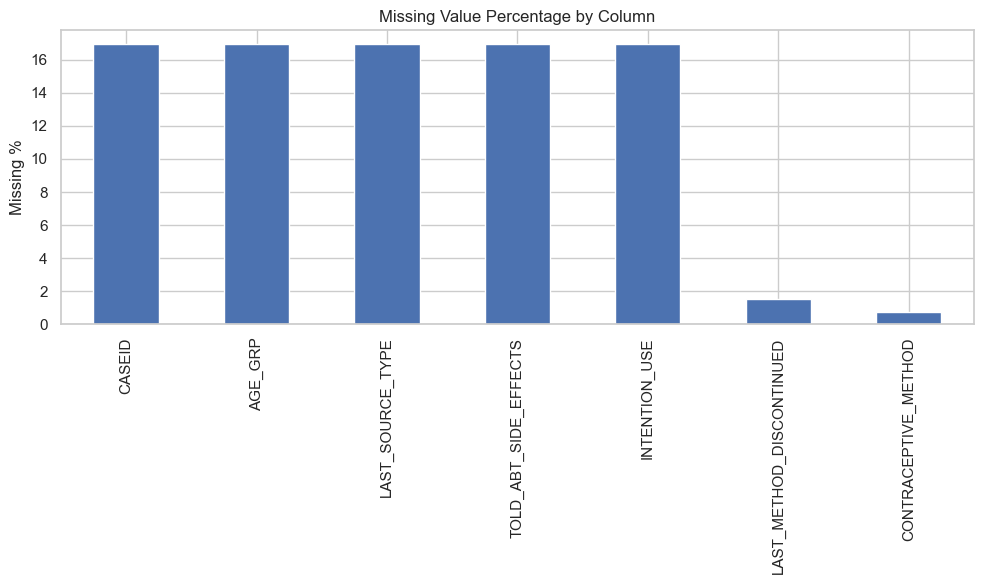

In [9]:
# Step 2: Missing values overview

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "n_missing": missing_counts,
    "missing_pct": missing_pct
})

display(missing_df.head(20))

plt.figure(figsize=(10, 6))
missing_df[missing_df["missing_pct"] > 0]["missing_pct"].sort_values(ascending=False).plot(
    kind="bar"
)
plt.ylabel("Missing %")
plt.title("Missing Value Percentage by Column")
plt.tight_layout()
plt.show()

In [10]:
key_missing_cols = [
    "CASEID", "AGE_GRP", "LAST_SOURCE_TYPE", "INTENTION_USE",
    "TOLD_ABT_SIDE_EFFECTS", "LAST_METHOD_DISCONTINUED", "CONTRACEPTIVE_METHOD"
]

missing_key = missing_df.loc[key_missing_cols]
display(missing_key)

,n_missing,missing_pct
CASEID,1119,16.923775
AGE_GRP,1119,16.923775
LAST_SOURCE_TYPE,1119,16.923775
INTENTION_USE,1119,16.923775
TOLD_ABT_SIDE_EFFECTS,1119,16.923775
LAST_METHOD_DISCONTINUED,101,1.527526
CONTRACEPTIVE_METHOD,51,0.771325



=== AGE summary ===


count    6612.000000
mean       30.306715
std         7.205059
min        15.000000
25%        25.000000
50%        30.000000
75%        36.000000
max        49.000000
Name: AGE, dtype: float64

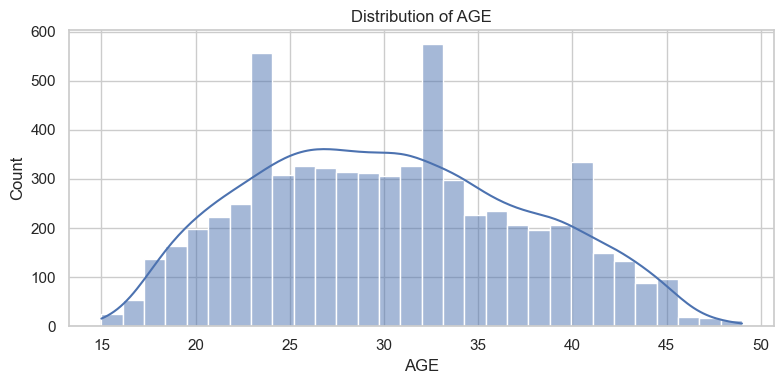


=== PARITY summary ===


count    6612.000000
mean        2.686933
std         1.832163
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: PARITY, dtype: float64

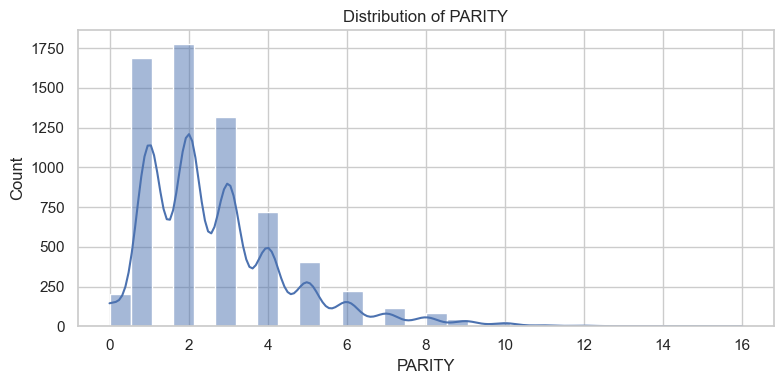

In [11]:
# Step 3: Key distributions

numeric_cols = ["AGE", "PARITY"]
cat_cols = [
    "CONTRACEPTIVE_METHOD", "MARITAL_STATUS", "EDUC_LEVEL",
    "CURRENT_USE_TYPE", "DESIRE_FOR_MORE_CHILDREN"
]

# Numeric distributions
for col in numeric_cols:
    print(f"\n=== {col} summary ===")
    display(df[col].describe())
    
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


=== CONTRACEPTIVE_METHOD value counts ===


,count,pct
CONTRACEPTIVE_METHOD,,
0,2258,34.150030
1,1140,17.241379
9,668,10.102843
3,442,6.684815
Injectables,399,6.034483
11,274,4.143981
Pills,254,3.841500
6,250,3.781004
Implants,190,2.873563


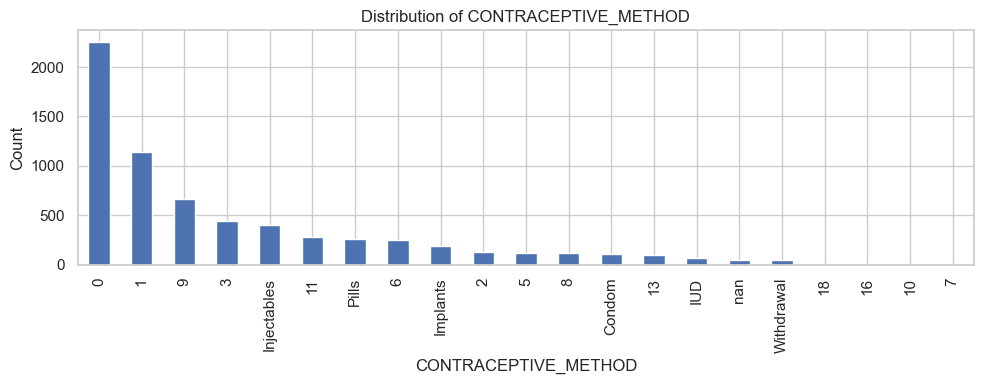


=== MARITAL_STATUS value counts ===


,count,pct
MARITAL_STATUS,,
1,2941,44.479734
2,2202,33.303085
Married,665,10.057471
0,230,3.478524
Living together,224,3.387780
Single,111,1.678766
5,94,1.421658
Widowed,62,0.937689
Separated,57,0.862069


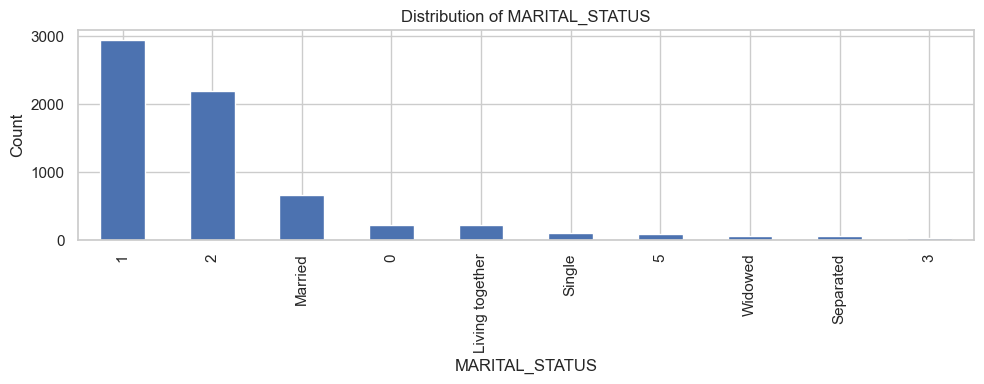


=== EDUC_LEVEL value counts ===


,count,pct
EDUC_LEVEL,,
2,2756,41.681791
3,1899,28.720508
1,770,11.645493
Secondary,524,7.924985
College,334,5.051422
Primary,155,2.344223
Vocational,78,1.179673
0,68,1.028433
No Education,28,0.423472


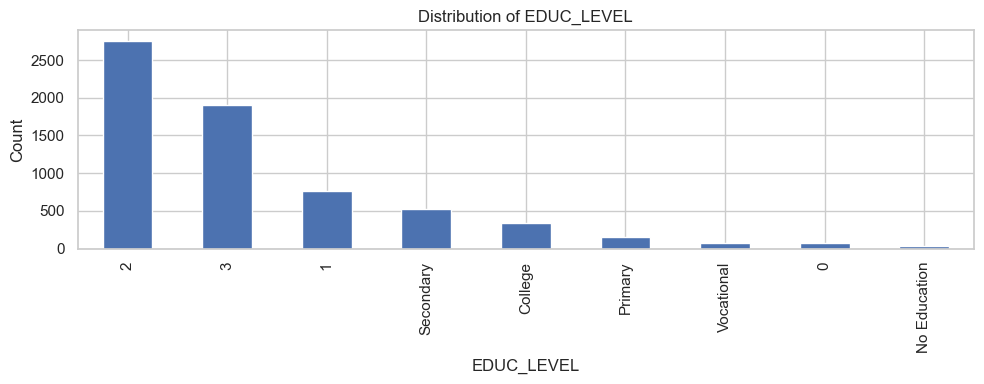


=== CURRENT_USE_TYPE value counts ===


,count,pct
CURRENT_USE_TYPE,,
3,2453,37.099214
0,2258,34.150030
Current user,1068,16.152450
2,781,11.811857
Non-user,51,0.771325
1,1,0.015124


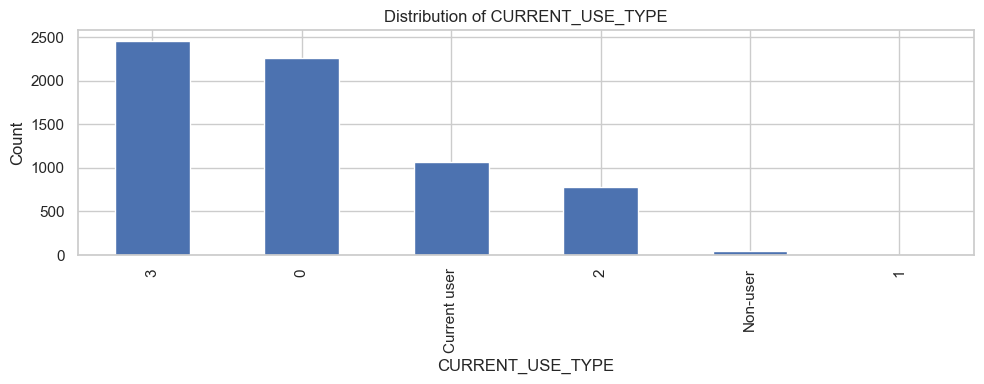


=== DESIRE_FOR_MORE_CHILDREN value counts ===


,count,pct
DESIRE_FOR_MORE_CHILDREN,,
5,2456,37.144586
2,1594,24.107683
4,745,11.267393
No,576,8.711434
Yes,434,6.563823
1,387,5.852995
6,251,3.796128
Undecided,109,1.648518
7,42,0.635209


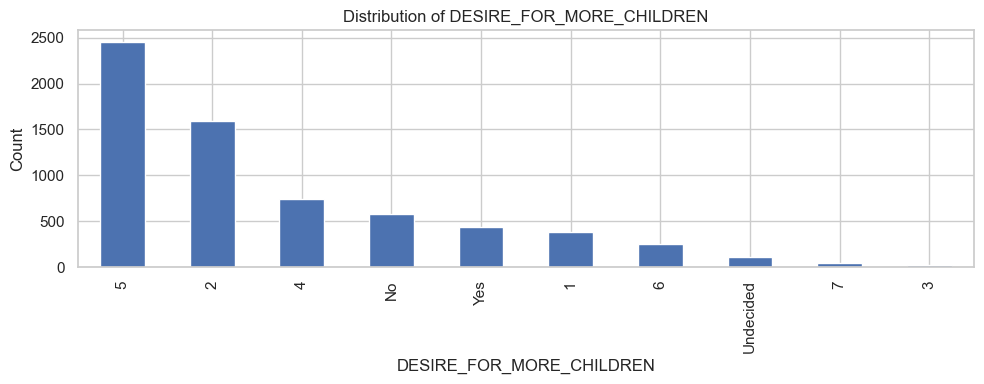

In [12]:
# Categorical distributions

for col in cat_cols:
    print(f"\n=== {col} value counts ===")
    vc = df[col].value_counts(dropna=False)
    display(pd.DataFrame({"count": vc, "pct": vc / len(df) * 100}))
    
    plt.figure(figsize=(10, 4))
    vc.plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


=== Class balance for CONTRACEPTIVE_METHOD ===


,count,pct
CONTRACEPTIVE_METHOD,,
0,2258,34.15
1,1140,17.24
9,668,10.10
3,442,6.68
Injectables,399,6.03
11,274,4.14
Pills,254,3.84
6,250,3.78
Implants,190,2.87


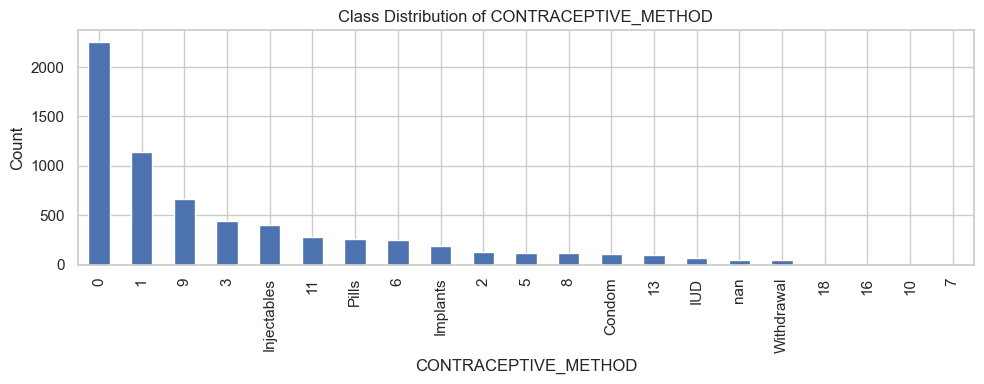


=== Class balance for CURRENT_USE_TYPE ===


,count,pct
CURRENT_USE_TYPE,,
3,2453,37.10
0,2258,34.15
Current user,1068,16.15
2,781,11.81
Non-user,51,0.77
1,1,0.02


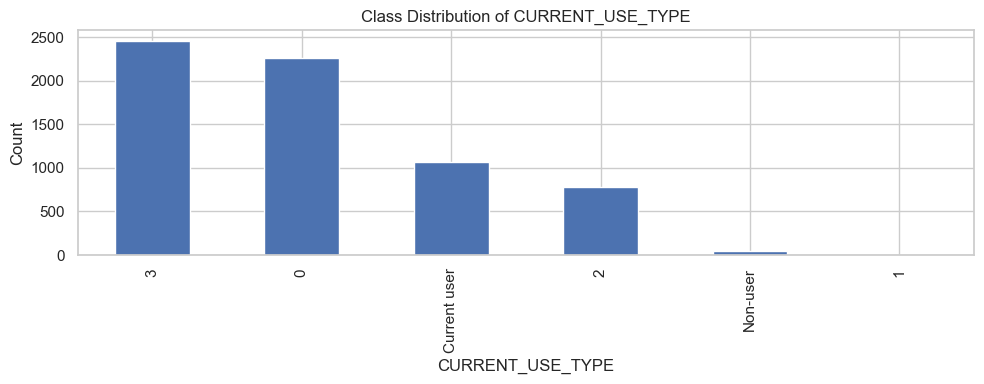


=== Class balance for CONTRACEPTIVE_USE_AND_INTENTION ===


,count,pct
CONTRACEPTIVE_USE_AND_INTENTION,,
1,2453,37.10
4,1506,22.78
2,782,11.83
3,752,11.37
Using and intends to continue,568,8.59
Not using but intends to use,218,3.30
Using but intends to stop,217,3.28
Not using and no intention,116,1.75


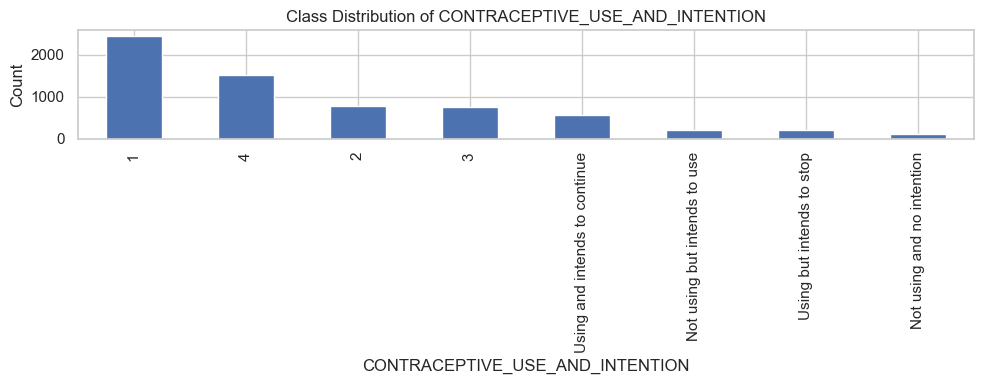

In [13]:
# Step 4: Class balance for potential target variables

target_candidates = [
    "CONTRACEPTIVE_METHOD",
    "CURRENT_USE_TYPE",
    "CONTRACEPTIVE_USE_AND_INTENTION"
]

for target in target_candidates:
    print(f"\n=== Class balance for {target} ===")
    vc = df[target].value_counts(dropna=False)
    balance_df = pd.DataFrame({
        "count": vc,
        "pct": (vc / len(df) * 100).round(2)
    })
    display(balance_df)
    
    plt.figure(figsize=(10, 4))
    vc.plot(kind="bar")
    plt.title(f"Class Distribution of {target}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [14]:
def imbalance_ratio(series):
    vc = series.value_counts()
    return vc.max() / vc.min()

for target in target_candidates:
    ir = imbalance_ratio(df[target].dropna())
    print(f"{target}: Imbalance ratio = {ir:.2f}")

CONTRACEPTIVE_METHOD: Imbalance ratio = 2258.00
CURRENT_USE_TYPE: Imbalance ratio = 2453.00
CONTRACEPTIVE_USE_AND_INTENTION: Imbalance ratio = 21.15


,AGE,AGE_GRP,PARITY
AGE,1.000000,0.979537,0.451376
AGE_GRP,0.979537,1.000000,0.529606
PARITY,0.451376,0.529606,1.000000


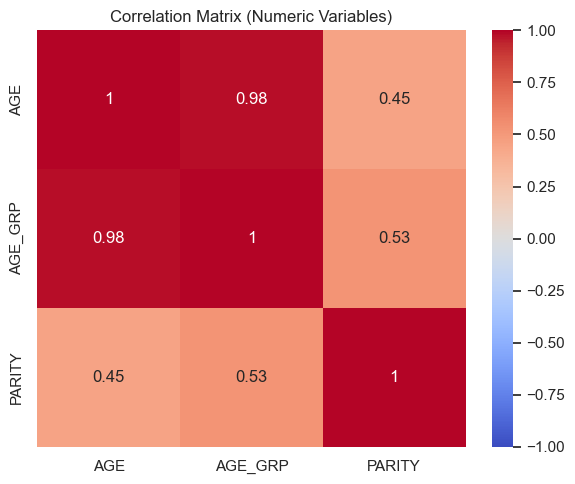

In [15]:
# Step 5: Correlation between numeric variables

numeric_for_corr = ["AGE", "AGE_GRP", "PARITY"]
corr_matrix = df[numeric_for_corr].corr()
display(corr_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numeric Variables)")
plt.tight_layout()
plt.show()

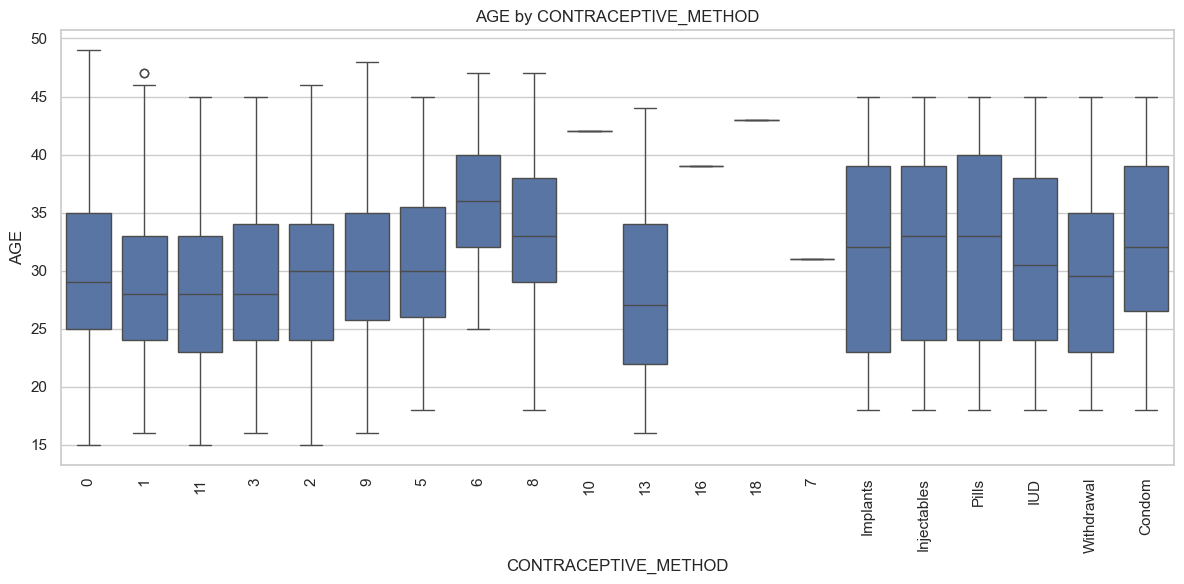

In [16]:
# Example: AGE vs CONTRACEPTIVE_METHOD

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="CONTRACEPTIVE_METHOD", y="AGE")
plt.title("AGE by CONTRACEPTIVE_METHOD")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

MARITAL_STATUS,0,1,2,3,5,Living together,Married,Separated,Single,Widowed
CONTRACEPTIVE_METHOD,,,,,,,,,,
0,7.971656,55.757307,31.930912,1.062888,3.277236,0.0,0.0,0.0,0.0,0.0
1,0.877193,48.596491,50.263158,0.000000,0.263158,0.0,0.0,0.0,0.0,0.0
10,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
11,2.919708,44.160584,51.094891,0.000000,1.824818,0.0,0.0,0.0,0.0,0.0
13,4.040404,44.444444,49.494949,0.000000,2.020202,0.0,0.0,0.0,0.0,0.0


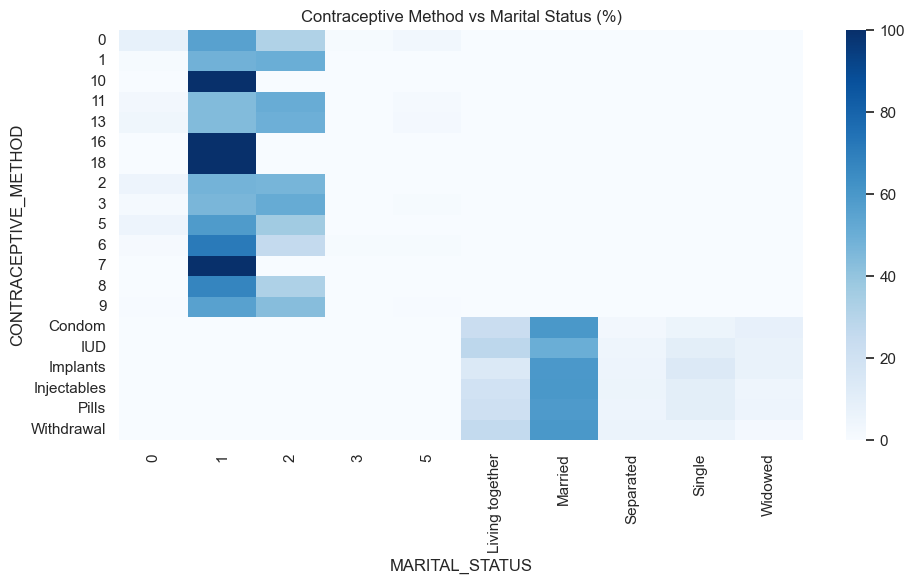

In [17]:
# Example: CONTRACEPTIVE_METHOD vs MARITAL_STATUS

ct = pd.crosstab(df["CONTRACEPTIVE_METHOD"], df["MARITAL_STATUS"], normalize="index") * 100
display(ct.head())

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=False, cmap="Blues")
plt.title("Contraceptive Method vs Marital Status (%)")
plt.ylabel("CONTRACEPTIVE_METHOD")
plt.xlabel("MARITAL_STATUS")
plt.tight_layout()
plt.show()